In [78]:
import sys
sys.path.append("C:\\Users\\yosiiiir\\Study_M2\\robo_ga_com")
import numpy as np
import math
import tool.robot_function as rof
import tool.rw_function as rwf

In [179]:
fuzzy1_paras = {"out_level1":3,
                "fuzzy_rule1" :np.array([[[0,1,2],[0,1,1],[0,0,0]],[[1,2,2],[1,1,1],[0,0,0]],[[2,2,2],[1,1,1],[0,0,0]]]),
                "set_types1" :[1,1,1,-1],
                "Kch1" : True
               }

fuzzy2_paras = {"out_level2": 7,
                "fuzzy_rule2":np.array([[0,0,0,1,2,3,4],[0,0,1,1,2,3,4],[0,1,1,2,3,4,5],[0,1,2,3,4,5,6],[1,2,3,4,5,5,6],[2,3,4,5,5,6,6],[2,3,4,5,6,6,6]]),
                "set_types2": [0,0,0],
                "Kch2" : True
               }
robot1 = rof.obj_func(fuzzy_rule1 = fuzzy1_paras["fuzzy_rule1"],
                           set_types1 = fuzzy1_paras["set_types1"],
                           out_level1 = fuzzy1_paras["out_level1"],
                           fuzzy_rule2 = fuzzy2_paras["fuzzy_rule2"],
                           set_types2 = fuzzy2_paras["set_types2"],
                           out_level2 = fuzzy2_paras["out_level2"],
                           object_items = ["end_time"])

divi1 =  rwf.output_divi(fuzzy1_paras["fuzzy_rule1"],fuzzy1_paras["set_types1"],fuzzy1_paras["Kch1"],fuzzy1_paras["out_level1"])
divi2 =  rwf.output_divi( fuzzy2_paras["fuzzy_rule2"], fuzzy2_paras["set_types2"], fuzzy2_paras["Kch2"], fuzzy2_paras["out_level2"])
divi_list = divi1+divi2

In [180]:
#個体のパラメータ
X = [0.090368595,0.940329659,284.5358381,77.55445126,112.1853415,420.3211786,179.009362,167.5195586,0.589438159,0.739870936,0.738117933,175.7065886,191.7251473,64.24495179,100.3265892,198.5372854,195.5793141]
Kis = rwf.Ks_divi(X,divi_list)

In [213]:
def one_step(robot,time_interval,time_detail): #time_intervalは1ステップ何秒であるかを指定する
    #制御周期か否か判断
    time_judge = ((robot.sum_time*10.0)/(time_interval*10.0)).is_integer()
    if time_judge:
        judge_pose_estimation = 0 ###本来は1
        nu,omega=robot.decision(robot.pose)
        robot.nu_m,robot.omega = nu,omega #速度・角速度更新
    else:
        judge_pose_estimation = 0
        nu,omega= robot.nu_m,robot.omega
    robot.sum_time = (robot.sum_time*10+(10*time_detail))/10 #合計時間
    
    #pose記録
    robot.li1.append(robot.pose[0])
    robot.li2.append(robot.pose[1])
    robot.li3.append(robot.pose[2])
    robot.now_nos.append(robot.now_no)
    #time_detail秒後の自己位置計算
    if judge_pose_estimation:
        #位置更新
        pass
    else:
        robot.pose=robot.state_transition(robot.nu_m,omega,robot.time_detail,robot.pose)
        
    if robot.pose[2] >= 2*math.pi:
        robot.pose[2]=robot.pose[2] - 2*math.pi
    elif robot.pose[2] < 0:
        robot.pose[2] = robot.pose[2] +2*math.pi
    #目標切り替えのための軌跡登録
    robot.orbit_register(robot.pose)
    return robot.move_end,judge_pose_estimation

In [214]:
#ファジィ制御生成+軌道点作成
lms = np.array([[0,0],[0,0.5],[0,1],[0,1.5],[0,2]])
robot1.fuzzy_produce(Kis,lms)
robot1.fpos = np.array([1,0,math.pi/2])
robot1.lms3 = lms
robot1.reset_init()
robot1.no_len = len(lms)
robot1.goal_no = 3

In [217]:
count = 0
for i in range(int(20/0.1)+1):
    move_end,judge_pose_estimation = one_step(robot1,0.5,0.1)
    if judge_pose_estimation:
        count += 1
    if move_end==True:
        arrvial_time = float(i/10)
        break

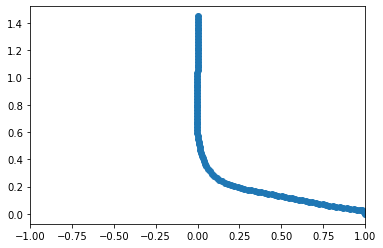

In [218]:
import matplotlib.pyplot as plt
plt.scatter(robot1.li1,robot1.li2)
plt.xlim([-1,1])
plt.show()

In [225]:
a = np.array([[0,0,0],[0,0,0],[1,1,0]]).reshape(-1,3,3)

In [238]:
b = np.array([[[1,2,3],[3,4,5],[6,7,8]],[[1,2,3],[3,4,5],[1,2,8]],[[1,2,3],[3,4,5],[3,4,8]]])

In [239]:
c = a*b

In [240]:
c  =c.astype("int8")

In [241]:
c.dtype

dtype('int8')

In [242]:
c

array([[[0, 0, 0],
        [0, 0, 0],
        [6, 7, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 2, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [3, 4, 0]]], dtype=int8)